In [1]:
import pyreadr
import pandas
import matplotlib.pyplot as plt

In [2]:
result = pyreadr.read_r('transactions.rds')

In [3]:
df = result[None]
df.head()

,id,type,timestamp,user,userAlias,onBehalfOf,onBehalfOfAlias,pool,reserve,amount,...,liquidatorAlias,priceInUsd,borrowRateModeTo,borrowRateModeFrom,stableBorrowRate,variableBorrowRate,target,totalFee,version,deployment
0,0xc70f4c3f447f6a88e9fbb87ac1394b589e469ee57dda...,borrow,1.606841e+09,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,Rocky Kuebler,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,Rocky Kuebler,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,DAI,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet
1,0x1ee3db904548c16d2ed3572f3d9894652e031facc8fa...,borrow,1.606902e+09,0x21d05071ca08593e13cd3afd0b4869537e015c92,Odaly Chihuahua-Tovar,0x21d05071ca08593e13cd3afd0b4869537e015c92,Odaly Chihuahua-Tovar,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,DAI,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet
2,0x1e8f85330edc5005ead7a7ae8c418fbb64df726d4ffc...,borrow,1.606905e+09,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,LINK,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet
3,0x43136c7aba13c072bb19ed88f8eadf859f0bfb994b42...,borrow,1.606913e+09,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0x39d637737cc76c5849a52c7d3b872a1eb22aa71c,Stephon Wal,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,AAVE,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet
4,0xd96af0cf05a1e99125fe51ee7e27a1c96cf40ea6e596...,borrow,1.606915e+09,0xdad4c11e8cc6a5c37808d3b31b3b284809f702d1,Jalen Mitchell,0xdad4c11e8cc6a5c37808d3b31b3b284809f702d1,Jalen Mitchell,0xb53c1a33016b2dc2ff3653530bff1848a515c8c5,DAI,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V2,Mainnet


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951343 entries, 0 to 1951342
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id                   object 
 1   type                 object 
 2   timestamp            float64
 3   user                 object 
 4   userAlias            object 
 5   onBehalfOf           object 
 6   onBehalfOfAlias      object 
 7   pool                 object 
 8   reserve              object 
 9   amount               float64
 10  amountUSD            float64
 11  amountETH            float64
 12  borrowRate           float64
 13  borrowRateMode       object 
 14  fromState            object 
 15  toState              object 
 16  liquidator           object 
 17  principalAmount      float64
 18  principalReserve     object 
 19  principalAmountUSD   float64
 20  principalAmountETH   float64
 21  collateralAmount     float64
 22  collateralReserve    object 
 23  collateralAmountUSD  float64
 24

Extrack the type of the transaction and plot the distribution of the transaction type.

<Axes: xlabel='type'>

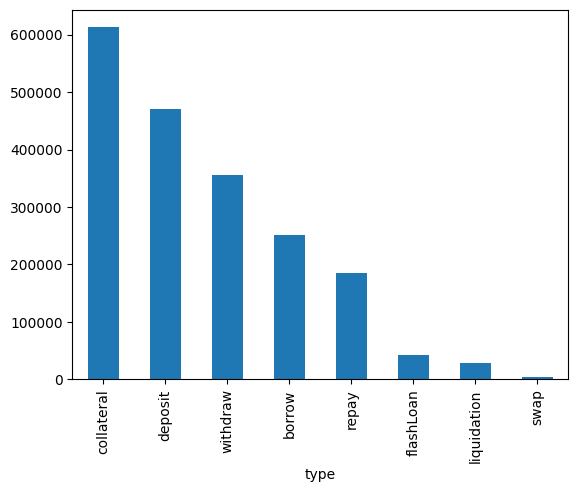

In [7]:
transactions_type = df["type"]

transactions_type.value_counts().plot(kind='bar')

Now we will plot only the borrow transaction, and we will see the distribution of the borrow transaction through the time.

In [8]:
# Get all borrow transactions
borrow_transactions = df[df["type"] == "borrow"]

# only keep id and timestamp
borrow_transactions = borrow_transactions[["id", "timestamp"]]
borrow_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251342 entries, 0 to 251341
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         251342 non-null  object 
 1   timestamp  251342 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.8+ MB


In [9]:
# convert timestamp to datetime, with unit days
borrow_transactions["timestamp"] = pandas.to_datetime(borrow_transactions["timestamp"], unit='s')
borrow_transactions.head()

# convert datetime to date
borrow_transactions["date"] = borrow_transactions["timestamp"].dt.date
borrow_transactions.head()

# drop timestamp
borrow_transactions = borrow_transactions.drop(columns=["timestamp"])
borrow_transactions.head()

,id,date
0,0xc70f4c3f447f6a88e9fbb87ac1394b589e469ee57dda...,2020-12-01
1,0x1ee3db904548c16d2ed3572f3d9894652e031facc8fa...,2020-12-02
2,0x1e8f85330edc5005ead7a7ae8c418fbb64df726d4ffc...,2020-12-02
3,0x43136c7aba13c072bb19ed88f8eadf859f0bfb994b42...,2020-12-02
4,0xd96af0cf05a1e99125fe51ee7e27a1c96cf40ea6e596...,2020-12-02


<Axes: xlabel='date'>

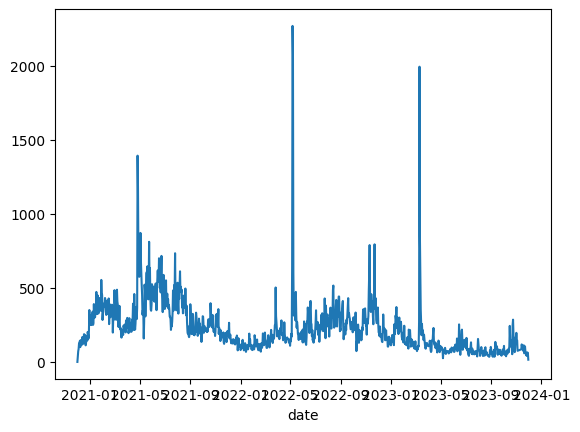

In [10]:
# Plot the number of borrow transactions through time
borrow_transactions["date"].value_counts().sort_index().plot()